In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('timeseries_train.csv')
df

,Year,Month,Indicator,Value,Unit
0,2026,April,CO2 levels,405.67,PPM
1,2035,July,CO2 levels,423.20,PPM
2,2044,December,CO2 levels,445.10,PPM
3,2023,January,CO2 levels,396.04,PPM
4,2027,July,CO2 levels,406.57,PPM
...,...,...,...,...,...
749,2043,August,CO2 levels,439.02,PPM
750,2035,August,CO2 levels,420.46,PPM
751,2048,December,CO2 levels,455.69,PPM
752,2004,October,CO2 levels,361.59,PPM


In [3]:
x_test = pd.read_csv('timeseries_test.csv')
x_test

,id,Year,Month,Indicator,Unit
0,0,2049,January,CO2 levels,PPM
1,1,2049,February,CO2 levels,PPM
2,2,2049,March,CO2 levels,PPM
3,3,2049,April,CO2 levels,PPM
4,4,2049,May,CO2 levels,PPM
5,5,2049,June,CO2 levels,PPM
6,6,2049,July,CO2 levels,PPM
7,7,2049,August,CO2 levels,PPM
8,8,2049,September,CO2 levels,PPM
9,9,2049,October,CO2 levels,PPM


In [4]:
df.drop(['Indicator','Unit'],axis=1,inplace=True)
df

,Year,Month,Value
0,2026,April,405.67
1,2035,July,423.20
2,2044,December,445.10
3,2023,January,396.04
4,2027,July,406.57
...,...,...,...
749,2043,August,439.02
750,2035,August,420.46
751,2048,December,455.69
752,2004,October,361.59


In [5]:
df=df.replace(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
          ,[1,2,3,4,5,6,7,8,9,10,11,12])

In [6]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
df

,Year,Month,Value,date
0,2026,4,405.67,2026-04-01
1,2035,7,423.20,2035-07-01
2,2044,12,445.10,2044-12-01
3,2023,1,396.04,2023-01-01
4,2027,7,406.57,2027-07-01
...,...,...,...,...
749,2043,8,439.02,2043-08-01
750,2035,8,420.46,2035-08-01
751,2048,12,455.69,2048-12-01
752,2004,10,361.59,2004-10-01


In [7]:
df=df[["date","Value"]]
df.head()

,date,Value
0,2026-04-01,405.67
1,2035-07-01,423.20
2,2044-12-01,445.10
3,2023-01-01,396.04
4,2027-07-01,406.57


In [8]:
df = df.sort_values(by='date').reset_index(drop=True)
df

,date,Value
0,1986-03-01,347.27
1,1986-04-01,349.20
2,1986-05-01,349.26
3,1986-06-01,348.96
4,1986-07-01,347.45
...,...,...
749,2048-08-01,454.06
750,2048-09-01,452.67
751,2048-10-01,452.66
752,2048-11-01,454.43


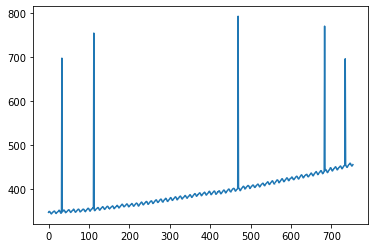

In [9]:
plt.plot(df.index,df.Value)

In [10]:
index = df[df.Value>600].index
index

Int64Index([33, 112, 469, 683, 734], dtype='int64')

In [11]:
for i in index:
    df['Value'][i] = np.nan
df

C:\Users\debku\AppData\Local\Temp\ipykernel_9524\706382596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'][i] = np.nan


,date,Value
0,1986-03-01,347.27
1,1986-04-01,349.20
2,1986-05-01,349.26
3,1986-06-01,348.96
4,1986-07-01,347.45
...,...,...
749,2048-08-01,454.06
750,2048-09-01,452.67
751,2048-10-01,452.66
752,2048-11-01,454.43


In [12]:
index = df[df.Value.isnull()].index
index

Int64Index([ 17,  33,  92, 112, 150, 225, 282, 296, 323, 341, 370, 419, 452,
            469, 487, 514, 560, 591, 638, 669, 683, 734, 742],
           dtype='int64')

In [13]:
for i in index:
    df.iloc[i,1] = (df.iloc[i-1,1]+df.iloc[i+1,1])/2
df.isnull().sum()

date     0
Value    0
dtype: int64

In [14]:
MAX = df.Value.max()
MIN = df.Value.min()

In [15]:
df.Value=(df.Value.values-MIN)/(MAX-MIN)
df

,date,Value
0,1986-03-01,0.031204
1,1986-04-01,0.047933
2,1986-05-01,0.048453
3,1986-06-01,0.045852
4,1986-07-01,0.032764
...,...,...
749,2048-08-01,0.956835
750,2048-09-01,0.944786
751,2048-10-01,0.944700
752,2048-11-01,0.960042


<AxesSubplot:>

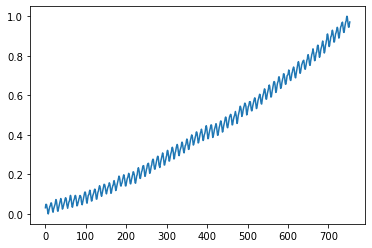

In [16]:
df.Value.plot()

<AxesSubplot:>

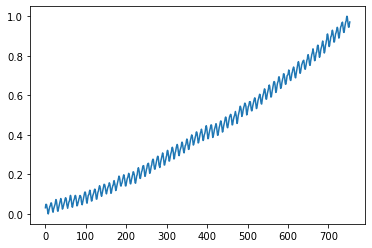

In [17]:
df.Value.plot()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
x_train = df["Value"]
x_train

0      0.031204
1      0.047933
2      0.048453
3      0.045852
4      0.032764
         ...   
749    0.956835
750    0.944786
751    0.944700
752    0.960042
753    0.970963
Name: Value, Length: 754, dtype: float64

In [20]:
L = (x_train-x_train.shift(2))
L.dropna(inplace=True)
L

2      0.017249
3     -0.002080
4     -0.015689
5     -0.022016
6     -0.025397
         ...   
749   -0.036405
750   -0.029557
751   -0.012135
752    0.015255
753    0.026263
Name: Value, Length: 752, dtype: float64

<AxesSubplot:>

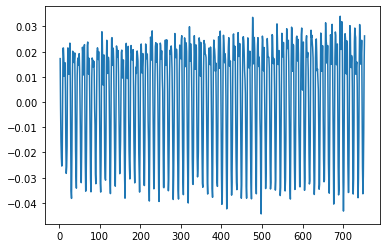

In [21]:
L.plot()

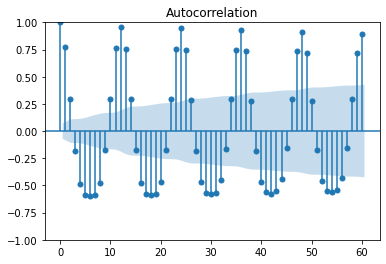

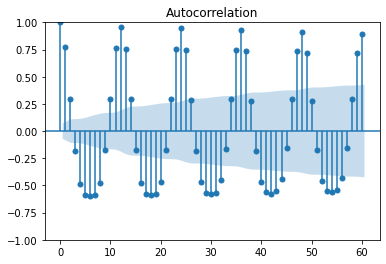

In [22]:
plot_acf(L,lags=60)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


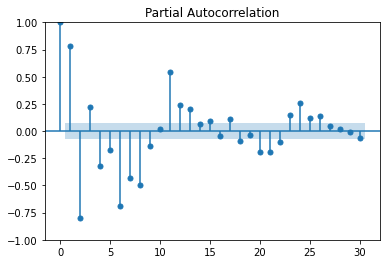

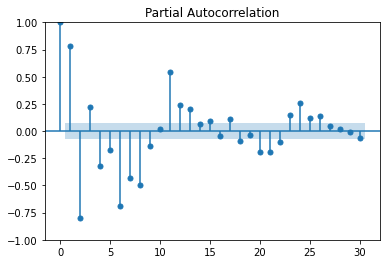

In [23]:
plot_pacf(L,lags=30)

In [24]:
model = ARIMA(x_train,order=(9,2,9))
model = model.fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                  754
Model:                 ARIMA(9, 2, 9)   Log Likelihood                3228.174
Date:                Tue, 17 Oct 2023   AIC                          -6418.349
Time:                        10:08:23   BIC                          -6330.517
Sample:                             0   HQIC                         -6384.509
                                - 754                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1497      0.266      0.563      0.573      -0.371       0.670
ar.L2         -0.3328      0.240     -1.384      0.166      -0.804       0.139
ar.L3          0.0692      0.209      0.332      0.740      -0.340       0.478
ar.L4         -0.8061      0.207     -3.887      0.000      -1.213      -0.400
ar.L5         -0.1992      0.156     -1.280      0.200      -0.504       0.106
ar.L6          0.0517      0.155      0.334      0.739      -0.252       0.355
ar.L7         -0.2777      0.156     -1.785      0.074      -0.583       0.027
ar.L8         -0.5385      0.189     -2.847      0.004      -0.909      -0.168
ar.L9         -0.3319      0.087     -3.824      0.000      -0.502      -0.162
ma.L1         -1.4873      0.264     -5.632      0.000      -2.005      -0.970
ma.L2          0.8875      0.543      1.634      0.102      -0.177       1.952
ma.L3         -0.5594      0.539     -1.037      0.300      -1.616       0.498
ma.L4          0.9262      0.481      1.926      0.054      -0.017       1.869
ma.L5         -0.8118      0.403     -2.014      0.044      -1.602      -0.022
ma.L6          0.0762      0.345      0.221      0.825      -0.599       0.752
ma.L7          0.1186      0.328      0.362      0.718      -0.524       0.761
ma.L8          0.3580      0.309      1.157      0.247      -0.248       0.964
ma.L9         -0.4201      0.157     -2.675      0.007      -0.728      -0.112
sigma2      1.068e-05   6.26e-07     17.060      0.000    9.46e-06    1.19e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.16   Prob(JB):                         0.68
Heteroskedasticity (H):               0.98   Skew:                             0.08
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start = len(x_train)
end = len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

754    0.983384
755    0.991585
756    0.999818
757    1.010356
758    1.018187
759    1.012481
760    0.996527
761    0.976603
762    0.964097
763    0.966649
764    0.980272
765    0.995095
766    1.006189
767    1.014306
768    1.022876
769    1.033332
770    1.040194
771    1.035481
772    1.019103
773    0.999533
774    0.987547
775    0.989811
776    1.003205
777    1.018178
Name: predicted_mean, dtype: float64

In [26]:
ID = x_test.id.values
ID

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [27]:
val = pred.values*(MAX-MIN)+MIN
val

array([457.12300305, 458.06917759, 459.01895652, 460.23481613,
       461.13828508, 460.47994288, 458.63928644, 456.34067344,
       454.89782609, 455.19228207, 456.76400115, 458.47412399,
       459.75404727, 460.69050918, 461.67922261, 462.88553754,
       463.67720816, 463.13339364, 461.24387544, 458.98609884,
       457.60331196, 457.86447467, 459.40974974, 461.13714858])

In [28]:
final = pd.DataFrame()
final['id'] = ID
final['Label'] = np.round(val,2)
final

,id,Label
0,0,457.12
1,1,458.07
2,2,459.02
3,3,460.23
4,4,461.14
5,5,460.48
6,6,458.64
7,7,456.34
8,8,454.90
9,9,455.19


In [29]:
final.to_csv('final4.csv',index=False)